## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### Datasets: https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 

#### Análisis Exploratorio de los datos

#### 1) Importo Datasets

In [3]:
ds2019 = pd.read_csv('dataset/historico-2019.csv', parse_dates=True)

In [4]:
ds2018 = pd.read_csv('dataset/molinetes-subte-18.csv', parse_dates=True)

In [5]:
ds2017 = pd.read_csv('dataset/molinetes_2017.csv',  encoding='latin-1', parse_dates=True)

#### Preview

In [6]:
ds2017.head()

,V1,FECHA,DESDE,HASTA,LINEA,MOLINETE,ID_ESTACION,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
0,1,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
1,2,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_N_TURN02,6,9 DE JULIO,1,0,0,1
2,3,01/01/2017,08:00:00,08:15:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,1,0,0,1
3,4,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN02,6,9 DE JULIO,1,0,0,1
4,5,01/01/2017,08:15:00,08:30:00,D,LINEA_D_9JULIO_S_TURN01,6,9 DE JULIO,2,0,0,2


In [7]:
ds2017.dtypes

V1                  int64
FECHA              object
DESDE              object
HASTA              object
LINEA              object
MOLINETE           object
ID_ESTACION         int64
ESTACION           object
PAX_PAGOS           int64
PAX_PASES_PAGOS     int64
PAX_FREQ            int64
TOTAL               int64
dtype: object

In [8]:
ds2018.head()

,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
0,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_CBarros_S_Turn01,Castro Barros,1.0,0.0,0.0,1.0,201801
1,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_S_Turn03,Lima,4.0,0.0,0.0,4.0,201801
2,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Pasco_Turn01,Pasco,1.0,0.0,0.0,1.0,201801
3,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_Peru_S_Turn01,Peru,4.0,0.0,0.0,4.0,201801
4,2018-01-01,08:00:00,08:15:00,LineaA,LineaA_PJunta_S_Turn02,Primera Junta,2.0,0.0,0.0,2.0,201801


In [9]:
ds2018.dtypes

fecha               object
desde               object
hasta               object
linea               object
molinete            object
estacion            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
total              float64
periodo              int64
dtype: object

In [10]:
ds2019.head()

,periodo,fecha,desde,hasta,linea,molinete,estacion,pax_pagos,pax_pases_pagos,pax_franq,total
0,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Lima_N_Turn02,Lima,1.0,0.0,0.0,1.0
1,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Loria_N_Turn03,Loria,3.0,0.0,0.0,3.0
2,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_Q_HALL_Turn01,Plaza Miserere,3.0,0.0,0.0,3.0
3,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn01,Plaza Miserere,6.0,0.0,0.0,6.0
4,201901,2019-01-01,08:00:00,08:15:00,LineaA,LineaA_Miserere_S_Turn03,Plaza Miserere,10.0,0.0,0.0,10.0


In [11]:
ds2019.dtypes

periodo              int64
fecha               object
desde               object
hasta               object
linea               object
molinete            object
estacion            object
pax_pagos          float64
pax_pases_pagos    float64
pax_franq          float64
total              float64
dtype: object

#### Convierto fechas a datetime

In [12]:
ds2017['FECHA'] = ds2017['FECHA'].astype('datetime64')
ds2018['fecha'] = ds2018['fecha'].astype('datetime64')
ds2019['fecha'] = ds2019['fecha'].astype('datetime64')

#### Agrupo pasajeros por día

In [13]:
grouped_2017 = ds2017.groupby('FECHA').sum()
grouped_2017.head()

,V1,ID_ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FREQ,TOTAL
FECHA,,,,,,
2017-01-01,116346875897,885011,83066,24,3712,86802
2017-01-02,198773020743,1504729,814825,527,27545,842897
2017-01-03,201804728922,1509303,993900,618,29107,1023625
2017-01-04,186327717365,1419927,493747,569,18558,512874
2017-01-05,143368810355,1057281,197276,307,7127,204710


In [14]:
grouped_2018 = ds2018.groupby('fecha').sum()
grouped_2018.head()

,pax_pagos,pax_pases_pagos,pax_franq,total,periodo
fecha,,,,,
2018-01-01,104473.0,66.0,3944.0,108483.0,4163356431
2018-01-02,871239.0,1165.0,26505.0,898909.0,7100973588
2018-01-03,939971.0,1191.0,28952.0,970114.0,7183913799
2018-01-04,900927.0,1101.0,27482.0,929510.0,7021867596
2018-01-05,923053.0,1079.0,26494.0,950626.0,7236583860


In [15]:
grouped_2019 = ds2019.groupby('fecha').sum()
grouped_2019.head()

,periodo,pax_pagos,pax_pases_pagos,pax_franq,total
fecha,,,,,
2019-01-01,4239921000,98685.0,81.0,3407.0,102173.0
2019-01-02,7423294067,811786.0,1087.0,23929.0,836802.0
2019-01-03,7586631976,964559.0,1240.0,30610.0,996409.0
2019-01-04,7594102313,964616.0,1184.0,30249.0,996049.0
2019-01-05,6477185981,383196.0,223.0,13228.0,396647.0


#### Me quedo con cantidad total de pasajeros en cada dataset

In [16]:
ts_2017 = grouped_2017[['TOTAL']]
ts_2017 = ts_2017.rename(columns = {'TOTAL':'total'})
ts_2018 = grouped_2018[['total']]
ts_2019 = grouped_2019[['total']]

#### Consolido datasets

In [17]:
molinetes = pd.concat([ts_2017, ts_2018, ts_2019])

In [18]:
molinetes.head()

,total
2017-01-01,86802.0
2017-01-02,842897.0
2017-01-03,1023625.0
2017-01-04,512874.0
2017-01-05,204710.0


In [19]:
molinetes.shape

(1092, 1)

#### Gráficos de la serie

#### Consolidado 3 años - 2017 a 2019

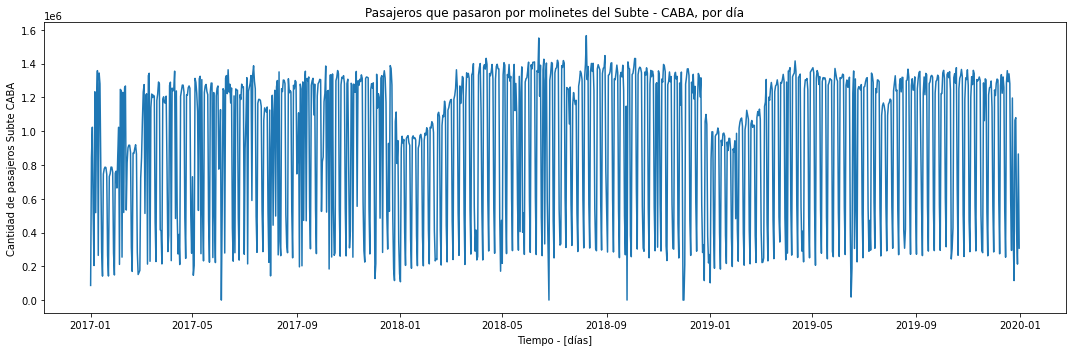

In [20]:
plt.figure(figsize=(15,5))
plt.plot(molinetes)
plt.title('Pasajeros que pasaron por molinetes del Subte - CABA, por día')
plt.ylabel('Cantidad de pasajeros Subte CABA')
plt.xlabel('Tiempo - [días]')
plt.xticks()
plt.tight_layout()


#### Descripción: En la serie temporal se muestra un patrón que se repite anualmente, y oscila entre aproximadamente 200.000 y 1,3 millones de ingresos diarios registrados en estaciones del subte. En Enero se observa la menor cantidad máxima de pasajeros, que corresponde a vacaciones de verano. A partir de allí los máximos comienzan a crecer hasta que alrededor del mes de Abril, donde esos máximos se estabilizan y se mantienen aproximadamente constantes hasta Diciembre que es donde comienzan a decrecer nuevamente. Se observa una caída breve en los máximos que ocurre alrededor del mes de Julio, que posiblemente corresponda al período de receso escolar de invierno. 

#### Oservo el mes de Abril de 2018

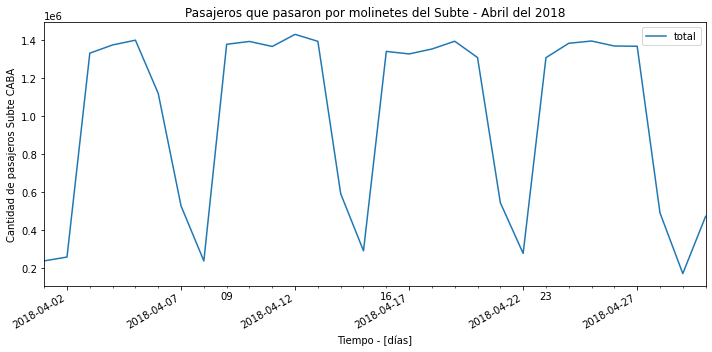

In [21]:

ax = molinetes['2018-04-01':'2018-04-30'].plot(figsize=(10,5))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.title('Pasajeros que pasaron por molinetes del Subte - Abril del 2018')
plt.ylabel('Cantidad de pasajeros Subte CABA')
plt.xlabel('Tiempo - [días]')
plt.gcf().autofmt_xdate()
plt.tight_layout()


#### Mirando de cerca un mes cualquiera (en este caso Abril del 2018) se observa también un patrón que se repite semanalmente. Se observan máximos de alrededor de 1.4 millones de Lunes a Viernes, decayendo a aprox 500,000 pasajeros los sábados y un mínimo de alrededor de 200,000 para los domingos. La primera semana de Abril muestra un ciclo más angosto ya que el Lunes 02 de Abril fue feriado en 2018.

#### Histograma

Text(0.5, 1.0, 'Histograma - 20 bins')

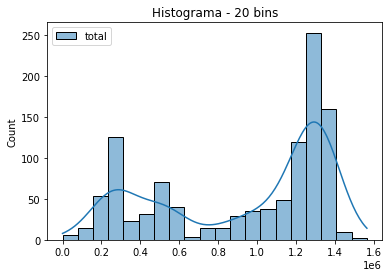

In [22]:
sns.histplot(molinetes, bins=20, kde=True)
plt.title('Histograma - 20 bins')

#### No se aprecia una distribución de datos conocida

#### Descomposición con Modelo Aditivo

In [23]:
from statsmodels.tsa.stattools import adfuller, acf, kpss, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [24]:
decomposed = sm.tsa.seasonal_decompose(molinetes, period=7, model='additive')

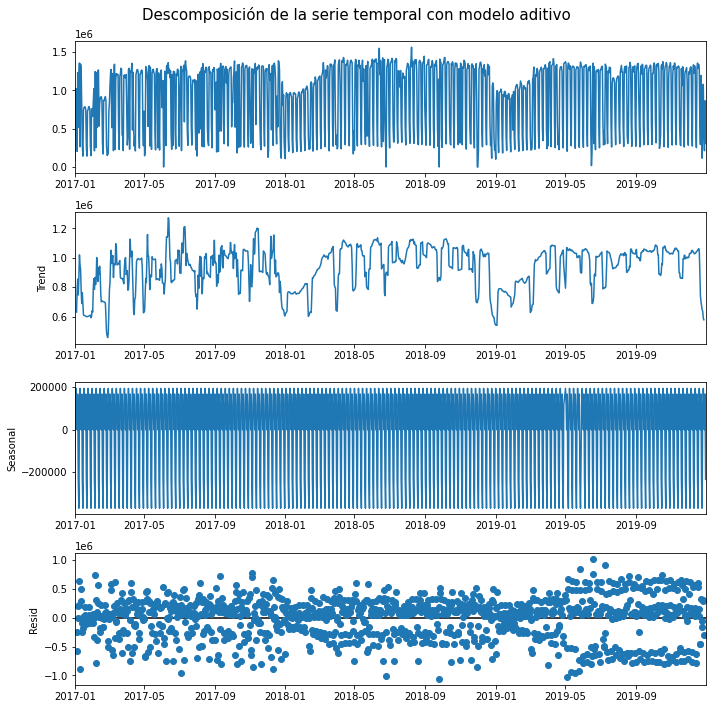

In [25]:

decomp_plot = decomposed.plot(observed=True, seasonal=True, trend=True, resid=True, weights=False)
decomp_plot.set_size_inches(10,10)
plt.suptitle("Descomposición de la serie temporal con modelo aditivo").set_fontsize(15)
plt.tight_layout()
plt.show()

### Estacionariedad

#### A simple vista, la serie no es estacionaria, se observa que la media y la varianza cambian con el tiempo. A continuación voy a hacer una evaluación formal con los métodos vistos en clase.

#### Autocorrelación y Autocorrelación Parcial 

In [26]:
acf(molinetes)

array([ 1.        ,  0.29155155, -0.17347456, -0.22164242, -0.29603802,
       -0.14258866,  0.25175606,  0.55304417,  0.23167457, -0.14104013,
       -0.26883716, -0.24764908, -0.12002898,  0.22877675,  0.52791267,
        0.18935598, -0.15241648, -0.25153701, -0.24477845, -0.1097797 ,
        0.24113639,  0.52231846,  0.20850463, -0.17515805, -0.27337951,
       -0.22147356, -0.12868694,  0.26950073,  0.57876035,  0.19086754,
       -0.14305941])

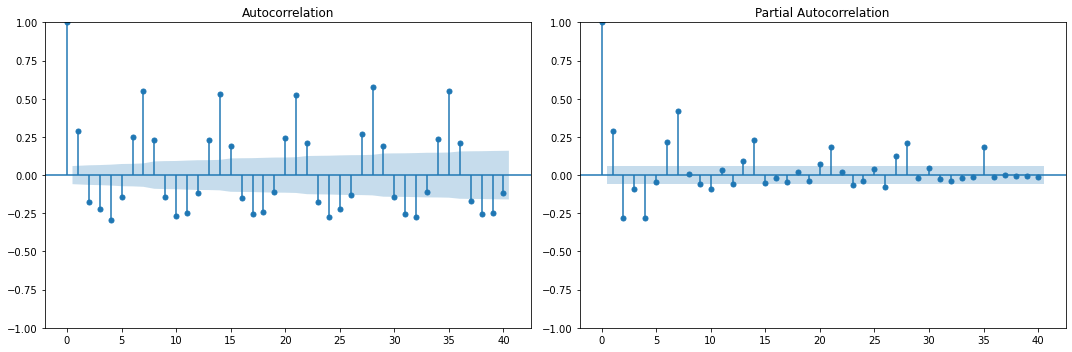

In [27]:

fig, ax = plt.subplots(1,2,figsize=(15,5))
sm.graphics.tsa.plot_acf(molinetes, lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(molinetes, method='ywm', lags=40, ax=ax[1])
plt.tight_layout()
plt.show()


#### Se observa una autocorrelacción con forma cíclica. Para lags grandes la autocorrelación no alcanza valores nulos, y esto indicaría que no es estacionaria.

#### Método de Dickey-Fuller Aumentado

In [28]:
adfuller(molinetes)

(-4.712644269778308,
 7.966876063772809e-05,
 22,
 1069,
 {'1%': -3.4364819663568262,
  '5%': -2.864247479652846,
  '10%': -2.568211560046239},
 30149.87315265922)

#### El pvalor en este caso da muy pequeño (0,000079) <0,05 es decir rechazo H0 y significaría que la serie es estacionaria (que no hay caminante aleatorio) de acuerdo a este test. Sin embargo, el test considera la serie diferenciada, así que voy a usar otros tests para complementar el análisis.
 

#### Test KPSS

In [29]:
kpss(molinetes, regression='ct')
#kpss(molinetes, regression='ct', nlags=1091)

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2002: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.06720761855372281,
 0.1,
 103,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

#### En el caso de este test, busco un pvalor grande (p_valor > 0.05 busco no rechazar H0) - el resultado muestra un pvalor = 0.1 con lo cual este test también estaría indicando que la serie es estacionaria.

#### Conclusión sobre los tests: adfuller y kpss dicen que la serie es estacionaria porque estos tests analizan otro tipo de no estacionariedad como por ejemplo debida a la presencia de caminante aleatorio y no van a detectar comportamientos cíclicos como en el caso de mi serie.

### Pre-procesamiento - Pruebo hacer transformaciones

#### BOX-COX

In [30]:
box_cox = molinetes.copy()

In [31]:
box_cox['total0'] = boxcox(box_cox['total'], lmbda=0.0) # Transformación logarítmica
box_cox['total0.05'] = boxcox(box_cox['total'], lmbda=0.05)
box_cox['total0.1'] = boxcox(box_cox['total'], lmbda=0.1) 
box_cox['total0.5'] = boxcox(box_cox['total'], lmbda=0.5) 

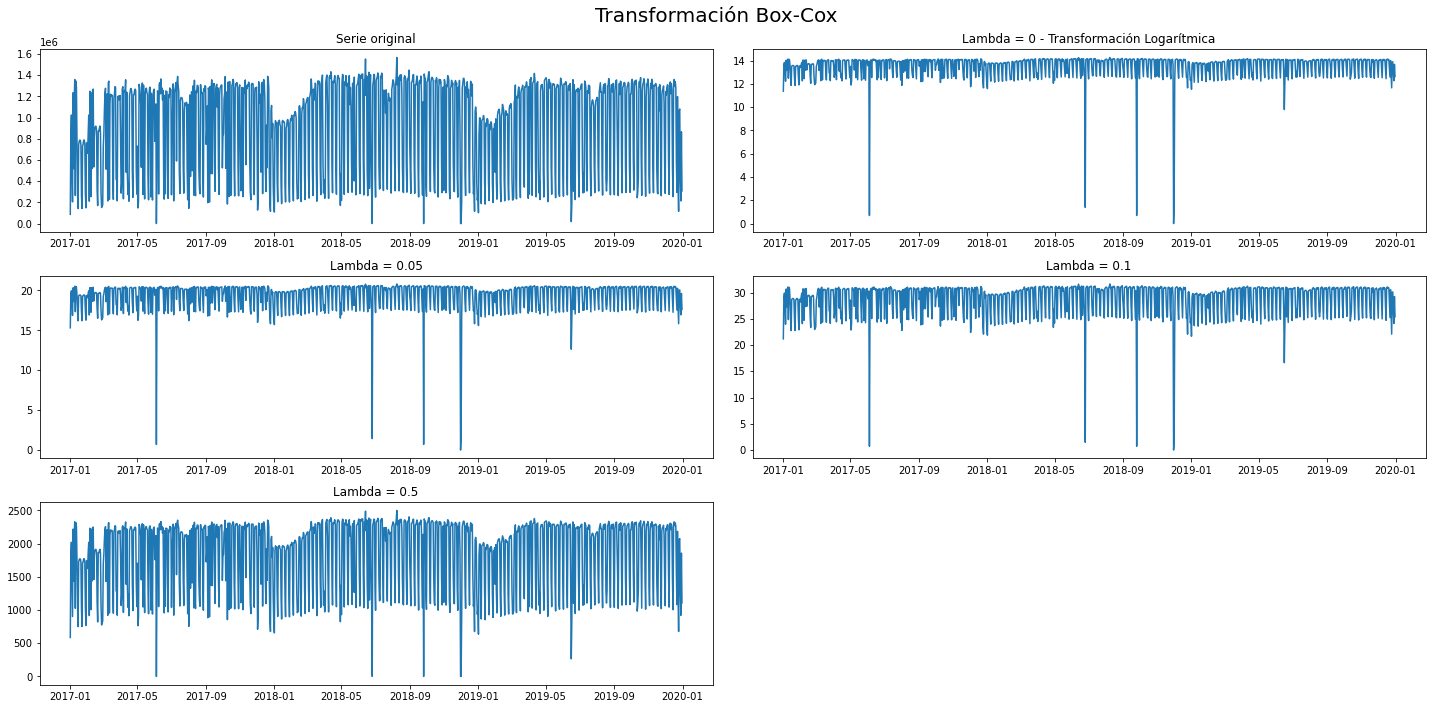

In [32]:
plt.figure(figsize=[20,10])

plt.subplot(3,2,1)
plt.plot(box_cox.total)
plt.title('Serie original')

plt.subplot(3,2,2)
plt.plot(box_cox.total0)
plt.title('Lambda = 0 - Transformación Logarítmica')

plt.subplot(3,2,3)
plt.plot(box_cox['total0.05'])
plt.title('Lambda = 0.05')


plt.subplot(3,2,4)
plt.plot(box_cox['total0.1'])
plt.title('Lambda = 0.1')

plt.subplot(3,2,5)
plt.plot(box_cox['total0.5'])
plt.title('Lambda = 0.5')

plt.suptitle('Transformación Box-Cox').set_fontsize(20)
plt.tight_layout()


#### Se ve el efecto de la transformación, para valores más pequeños de lambda se reduce el efecto en los cambios de varianza. También se observa una reducción de escala. Con la Transformación logarítmica parece que se reducen significativamente los cambios de varianza.

#### Autocorrelación de la serie transformada (con Transformación Logarítmica)

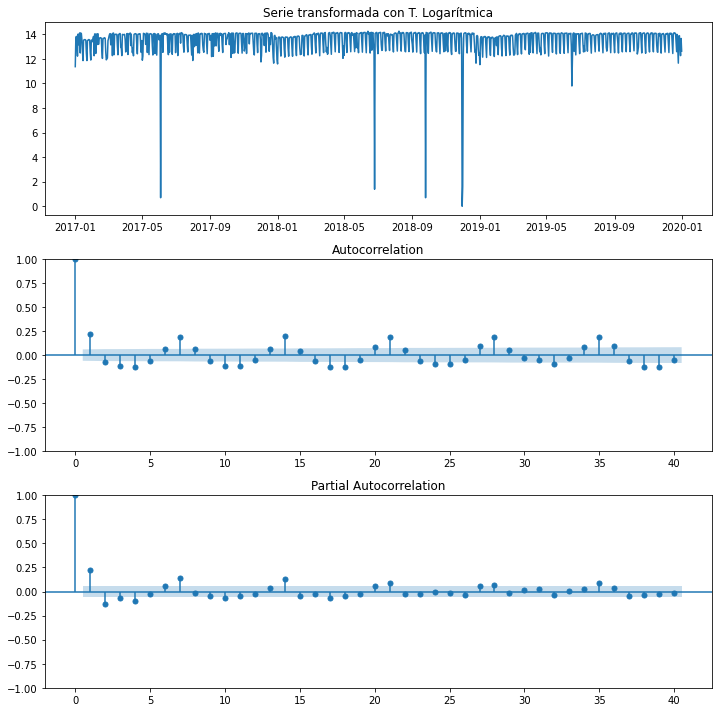

In [33]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].plot(box_cox.total0)
ax[0].set_title('Serie transformada con T. Logarítmica')
sm.graphics.tsa.plot_acf(box_cox.total0, lags=40, ax=ax[1])
sm.graphics.tsa.plot_pacf(box_cox.total0, method='ywm', lags=40, ax=ax[2])
plt.tight_layout()
plt.show()

#### Luego de esta transformación se ve en la gráfica de Autocorrelación que las amplitudes para lags más grandes se reducen bastante. Se mantienen pequeñas componentes cíclicas 

#### MEDIA Y MEDIANA MÓVIL

In [34]:
rolling_mean = molinetes.copy()
rolling_median = molinetes.copy()

In [35]:
rolling_mean['result_7']=rolling_mean['total'].rolling(7).mean()
rolling_mean['result_14']=rolling_mean['total'].rolling(14).mean()
rolling_mean['result_30']=rolling_mean['total'].rolling(30).mean()

In [36]:
rolling_median['result_7']=rolling_median['total'].rolling(7).median()
rolling_median['result_14']=rolling_median['total'].rolling(14).median()
rolling_median['result_30']=rolling_median['total'].rolling(30).median()

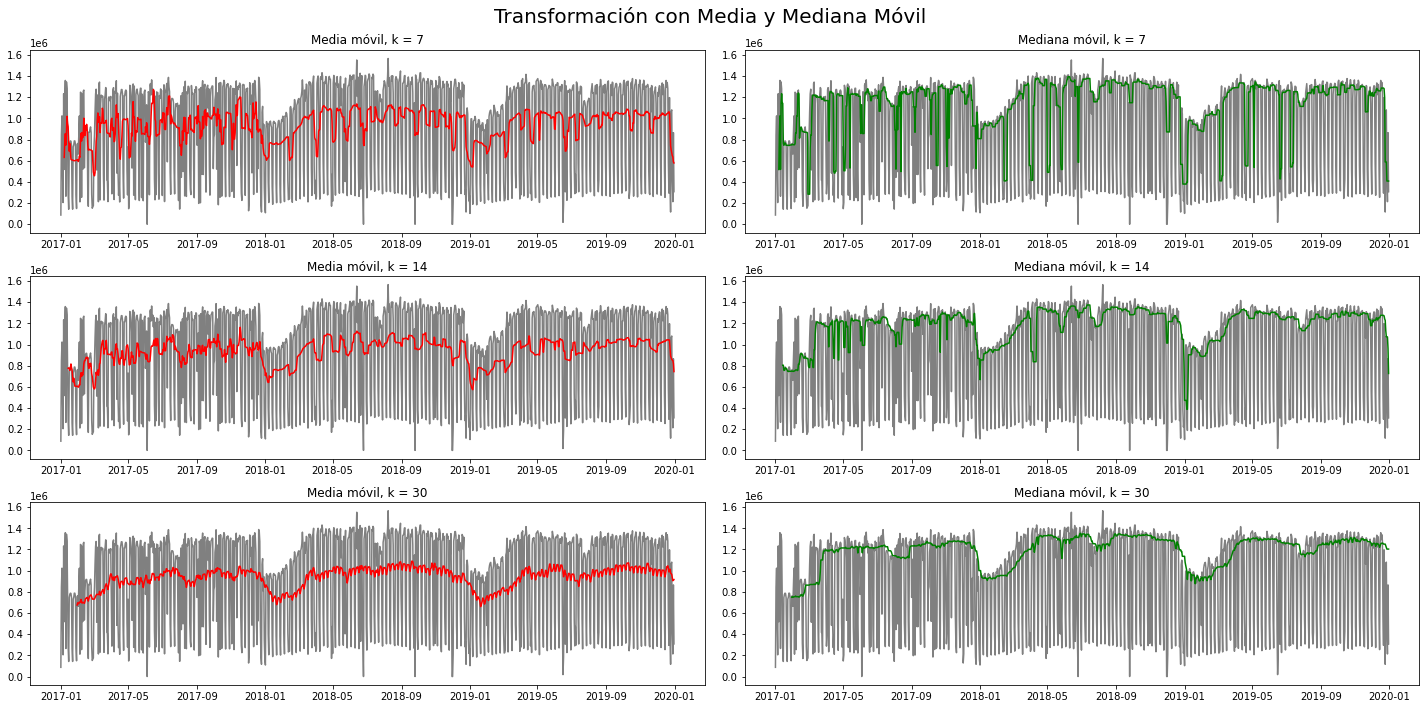

In [37]:
plt.figure(figsize=[20,10])

plt.subplot(3,2,1)
plt.plot(rolling_mean.total, color='gray')
plt.plot(rolling_mean['result_7'], color='red')
plt.title('Media móvil, k = 7')

plt.subplot(3,2,2)
plt.plot(rolling_median.total, color='gray')
plt.plot(rolling_median['result_7'], color='green')
plt.title('Mediana móvil, k = 7')

plt.subplot(3,2,3)
plt.plot(rolling_mean.total, color='gray')
plt.plot(rolling_mean['result_14'], color='red')
plt.title('Media móvil, k = 14')

plt.subplot(3,2,4)
plt.plot(rolling_median.total, color='gray')
plt.plot(rolling_median['result_14'], color='green')
plt.title('Mediana móvil, k = 14')

plt.subplot(3,2,5)
plt.plot(rolling_mean.total, color='gray')
plt.plot(rolling_mean['result_30'], color='red')
plt.title('Media móvil, k = 30')

plt.subplot(3,2,6)
plt.plot(rolling_median.total, color='gray')
plt.plot(rolling_median['result_30'], color='green')
plt.title('Mediana móvil, k = 30')

plt.suptitle('Transformación con Media y Mediana Móvil').set_fontsize(20)
plt.tight_layout()


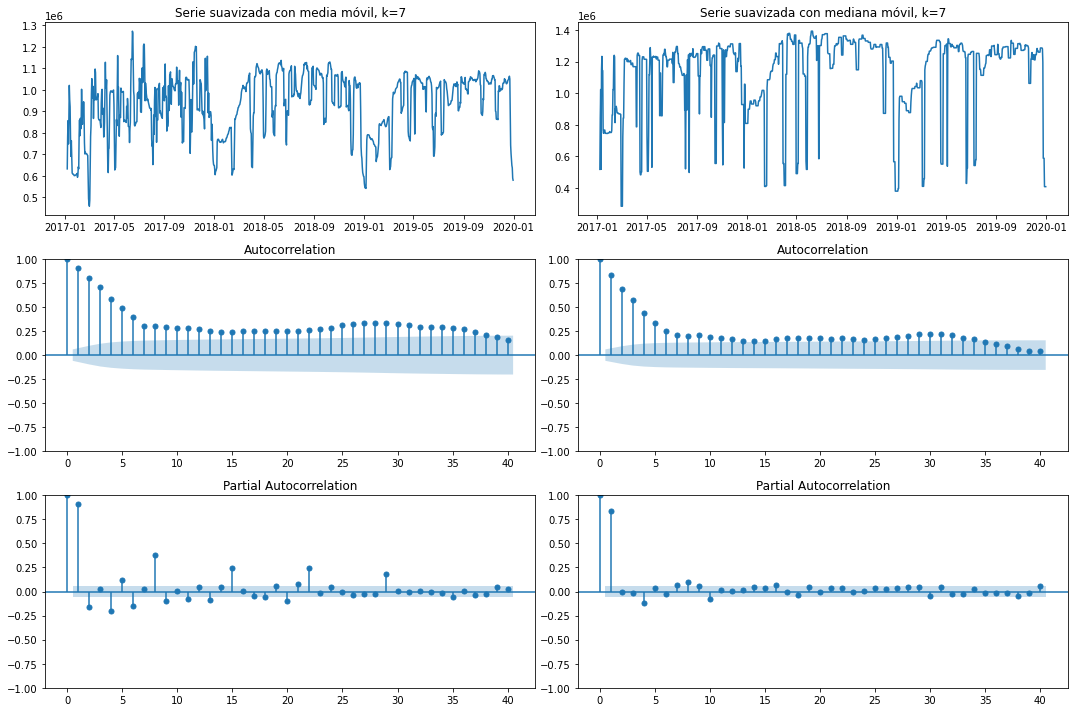

In [38]:
fig, ax = plt.subplots(3,2,figsize=(15,10))
ax[0,0].plot(rolling_mean.result_7)
ax[0,0].set_title('Serie suavizada con media móvil, k=7')
ax[0,1].plot(rolling_median.result_7)
ax[0,1].set_title('Serie suavizada con mediana móvil, k=7')
sm.graphics.tsa.plot_acf(rolling_mean.result_7[7:], lags=40, ax=ax[1,0])
sm.graphics.tsa.plot_pacf(rolling_mean.result_7[7:], method='ywm', lags=40, ax=ax[2,0])
sm.graphics.tsa.plot_acf(rolling_median.result_7[7:], lags=40, ax=ax[1,1])
sm.graphics.tsa.plot_pacf(rolling_median.result_7[7:], method='ywm', lags=40, ax=ax[2,1])
plt.tight_layout()
plt.show()

#### Aplicando suavizado con media y mediana móvil desaparecen los ciclos en la funcion de Autocorrelación pero si bien se reducen las amplitudes de los valores, no decrecen a cero para lags grandes.
#### La función de autocorrelación parcial muestra una componente grande en el lag 1.

### DIFERENCIACIÓN

In [39]:
difference = molinetes.copy()

In [40]:
difference['diff_1'] = difference['total'].diff()
difference['diff_7'] = difference['total'].diff(periods = 7)
difference['diff_365'] = difference['total'].diff(periods = 365)

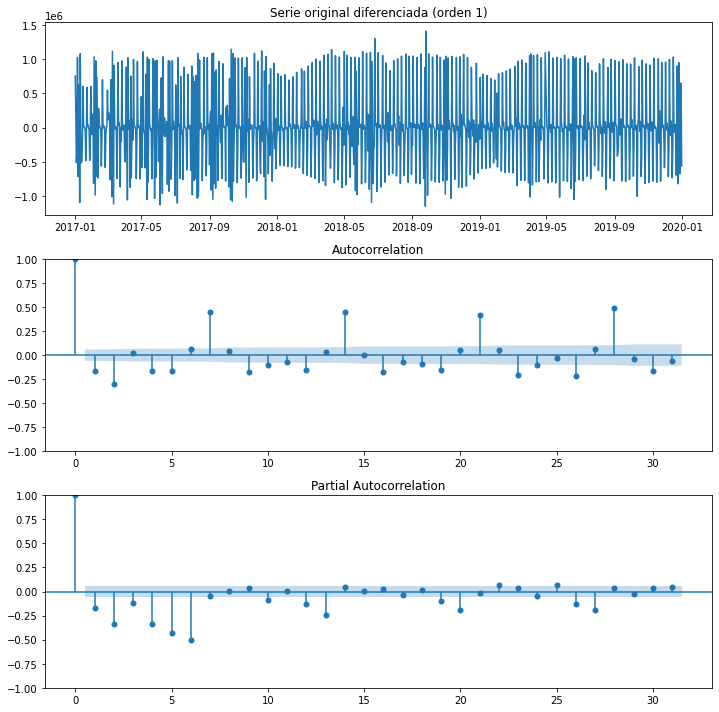

In [55]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].plot(difference.diff_1)
ax[0].set_title('Serie original diferenciada (orden 1)')
sm.graphics.tsa.plot_acf(difference.diff_1[1:], ax=ax[1])
sm.graphics.tsa.plot_pacf(difference.diff_1[1:], method='ywm', ax=ax[2])
plt.tight_layout()
plt.show()

#### Con orden se reducen las aplitudes de los valores de correlación pero se mantienen las componentes cíclicas semanales (cada aprox 7 lags)

#### Hago diferenciación considerando el período semanal (a 7 pasos)

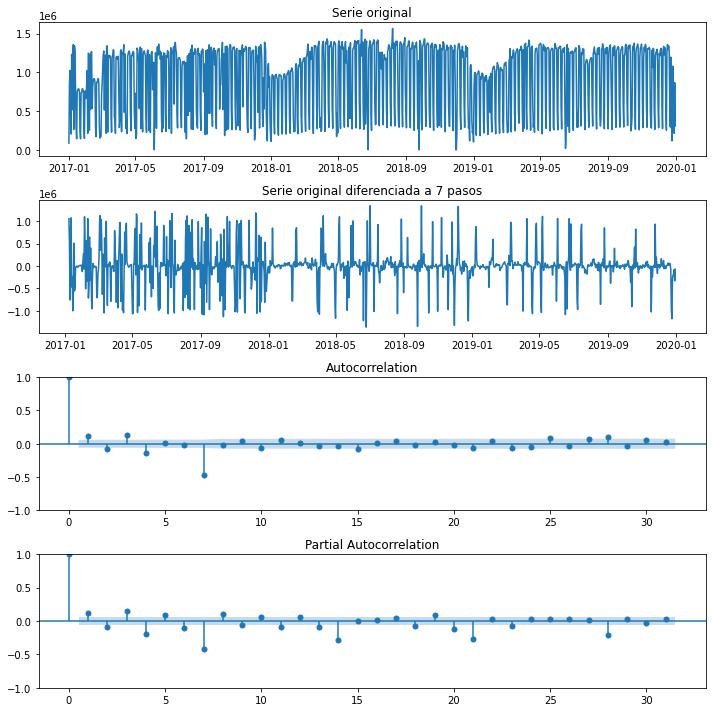

In [57]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].plot(molinetes)
ax[0].set_title('Serie original')
ax[1].plot(difference.diff_7)
ax[1].set_title('Serie original diferenciada a 7 pasos')
sm.graphics.tsa.plot_acf(difference.diff_7[7:], ax=ax[2])
sm.graphics.tsa.plot_pacf(difference.diff_7[7:], method='ywm', ax=ax[3])
plt.tight_layout()
plt.show()

#### En este caso prácticamente desaparecieron las componentes cíclicas semanales que era lo esperado

#### Me fijo qué pasaría si diferencio considerando un período anual (365) 

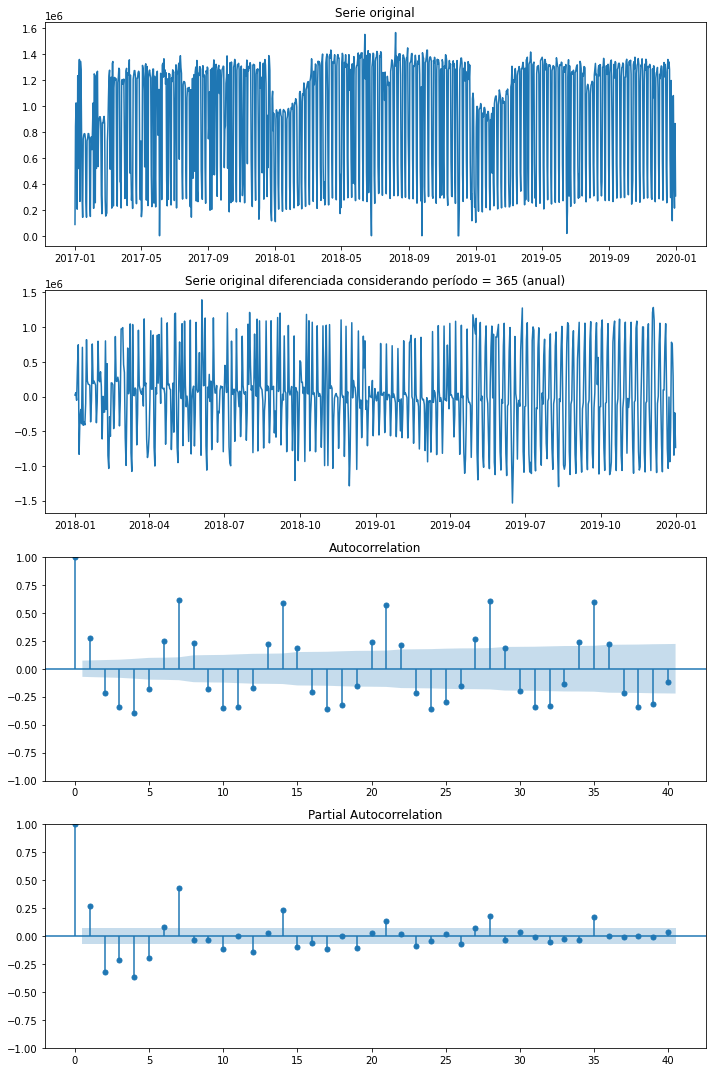

In [52]:
fig, ax = plt.subplots(4,1,figsize=(10,15))
ax[0].plot(molinetes)
ax[0].set_title('Serie original')
ax[1].plot(difference.diff_365)
ax[1].set_title('Serie original diferenciada considerando período = 365 (anual)')
sm.graphics.tsa.plot_acf(difference.diff_365[365:], lags=40, ax=ax[2])
sm.graphics.tsa.plot_pacf(difference.diff_365[365:], method='ywm', lags=40, ax=ax[3])
plt.tight_layout()
plt.show()

#### En este caso en realidad le estaría sacando a la serie la parte que me interesaba modelar, entonces no la voy a usar

#### ANÁLISIS DE TENDENCIA

#### Voy a estimar la tendencia cíclica por cuadrados mínimos. Mi serie tiene dos comportamientos cíclicos superpuestos, uno anual (que es el que me interesa) y uno semanal que no me interesa y quiero remover porque al modelo voy a poderle pasar una sola componente cíclica. Por lo tanto, voy a considerar un período igual a 7 días, estimar esa tendencia cíclica por cuadrados mínimos y restarla a la serie original.

In [44]:
N = 7 # N muestras en el periodo
periods =int(molinetes.shape[0]/N) # Nro de períodos 
trend = molinetes.copy().to_numpy() # Convierto a numpy para hacer las operaciones
trend = np.reshape(trend, (periods, N)) 
trend = np.mean(trend, axis=1)
trend = pd.DataFrame(np.tile(trend,N), columns=['Mean'])
trend = pd.DataFrame(trend, columns=['Mean'])


In [45]:
de_trend = molinetes.copy().reset_index()
de_trend.rename(columns = {'index':'tiempo'}, inplace=True)
de_trend['resultado'] = de_trend['total'] - trend['Mean']
de_trend.set_index('tiempo', inplace=True)
de_trend.head()

,total,resultado
tiempo,,
2017-01-01,86802.0,-544903.428571
2017-01-02,842897.0,-77337.000000
2017-01-03,1023625.0,417136.142857
2017-01-04,512874.0,-91645.857143
2017-01-05,204710.0,-427078.857143


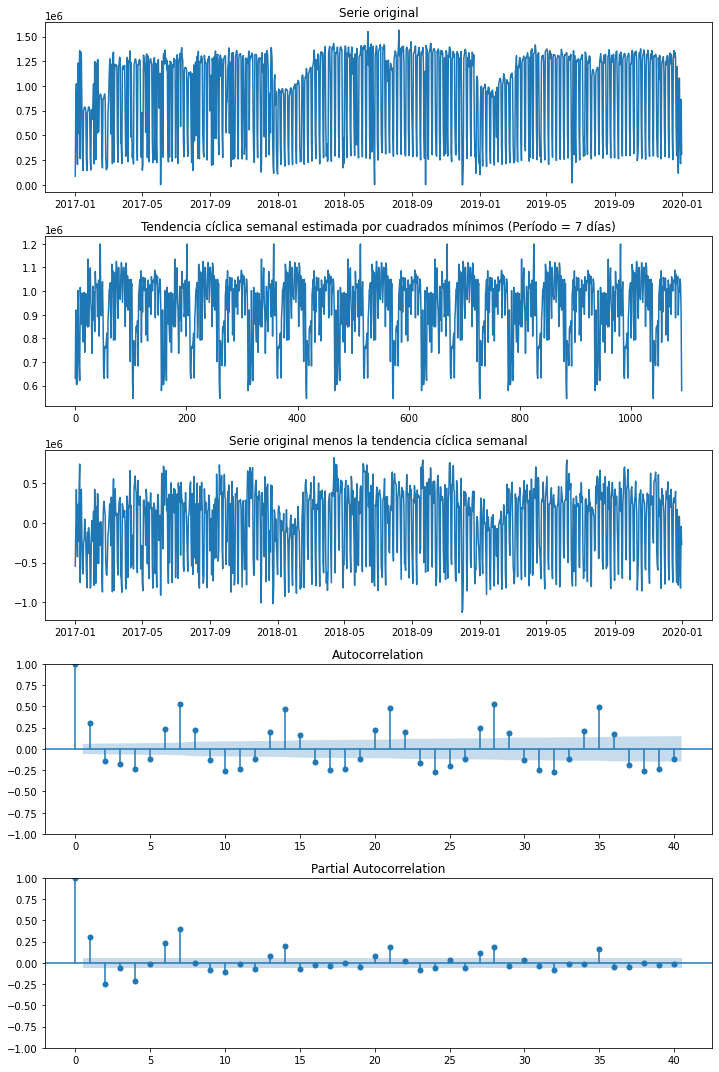

In [46]:
fig, ax = plt.subplots(5,1,figsize=(10,15))
ax[0].plot(molinetes)
ax[0].set_title('Serie original')
ax[1].plot(trend.Mean)
ax[1].set_title('Tendencia cíclica semanal estimada por cuadrados mínimos (Período = 7 días)')
ax[2].plot(de_trend.resultado)
ax[2].set_title('Serie original menos la tendencia cíclica semanal')
sm.graphics.tsa.plot_acf(de_trend.resultado, lags=40, ax=ax[3])
sm.graphics.tsa.plot_pacf(de_trend.resultado, method='ywm', lags=40, ax=ax[4])
plt.tight_layout()
plt.show()

### Pruebo una combinación

#### Combinación 1: T. Logarítmica + diferenciación a 7 pasos

In [47]:
# Aplico Transformación Logarítmica y luego diferenciación
difference['diff_comb1'] = box_cox.total0.diff(periods = 7)

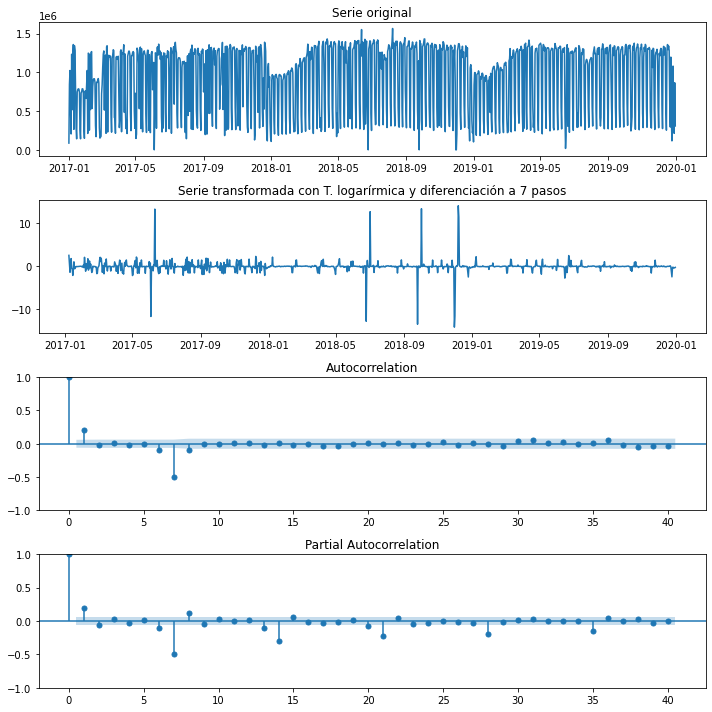

In [59]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].plot(molinetes)
ax[0].set_title('Serie original')
ax[1].plot(difference.diff_comb1)
ax[1].set_title('Serie transformada con T. logarírmica y diferenciación a 7 pasos')
sm.graphics.tsa.plot_acf(difference.diff_comb1[7:], lags=40, ax=ax[2])
sm.graphics.tsa.plot_pacf(difference.diff_comb1[7:], method='ywm', lags=40, ax=ax[3])
plt.tight_layout()
plt.show()

#### Combinando transformaciones se modifica significativamente la autocorrelación, casi desaparecen las componentes cíclicas.

#### Combinación 2: Resto tendenca cíclica (período 7) y diferencio a 1 paso

In [49]:
difference['diff_comb2'] = de_trend.resultado.diff(periods=7)

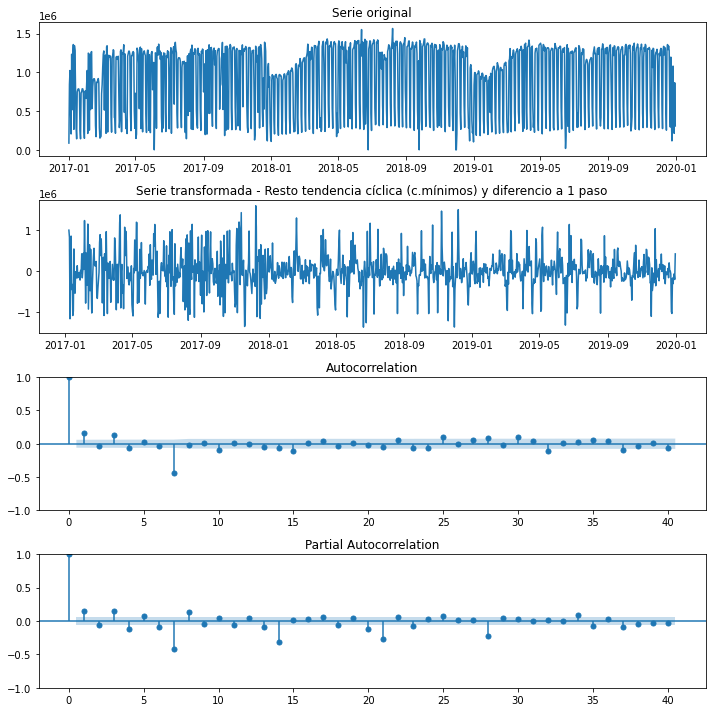

In [50]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].plot(molinetes)
ax[0].set_title('Serie original')
ax[1].plot(difference.diff_comb2)
ax[1].set_title('Serie transformada - Resto tendencia cíclica (c.mínimos) y diferencio a 1 paso')
sm.graphics.tsa.plot_acf(difference.diff_comb2[7:], lags=40, ax=ax[2])
sm.graphics.tsa.plot_pacf(difference.diff_comb2[7:], method='ywm', lags=40, ax=ax[3])
plt.tight_layout()
plt.show()

#### SIGUIENTE PASO - PROBAR MODELOS

#### Estimo modelo usando la serie diferenciada sin la componente cíclica semanal (p = 7)

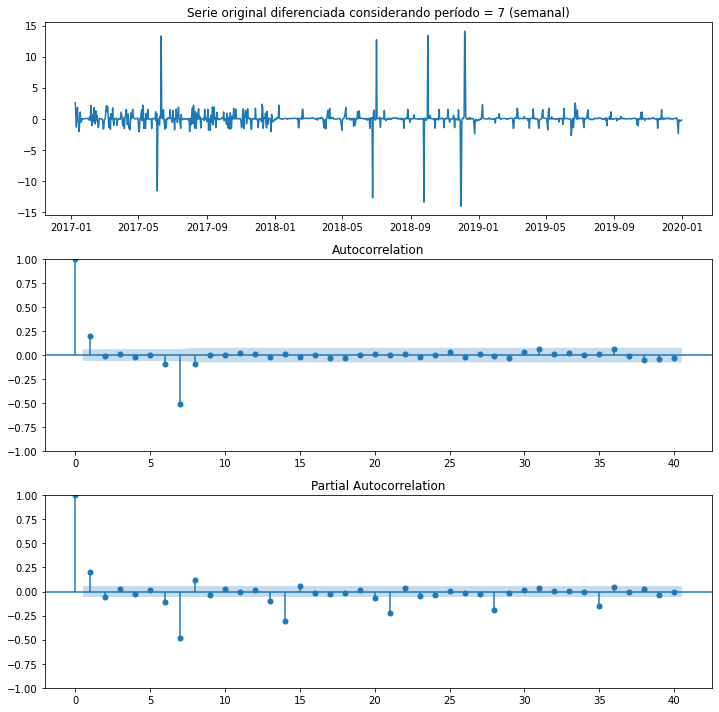

In [88]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].plot(difference.diff_comb1)
ax[0].set_title('Serie original diferenciada considerando período = 7 (semanal)')
sm.graphics.tsa.plot_acf(difference.diff_comb1[7:], lags=40, ax=ax[1])
sm.graphics.tsa.plot_pacf(difference.diff_comb1[7:], method='ywm', lags=40, ax=ax[2])
plt.tight_layout()
plt.show()

#### Primer modelo propuesto:
* Mirando la Autocorrelación, veo para la parte MA, un q=2
* Mirando la Autocorrelación Parcial, veo para la parte AR, un p=3
* d=0 
* Componentes estacionales: Veo que hay un patrón cada 7 muestras (ciclo semanal):
    * D=1
    * Q=2
    * P=3
    * s=7

In [102]:
def evaluate_model(series, my_order, my_seasonal_order):
    mod=sm.tsa.statespace.SARIMAX(series, order = my_order, seasonal_order = my_seasonal_order)
    #_, _, d = my_order
    #_, _, _, s = my_seasonal_order
    res = mod.fit(disp=False)
    print(res.summary())
    
    forecast = series.copy()
    forecast['predicted']=res.predict(start=0,end=1080)
    plt.figure(figsize=(12,8))
    plt.plot(series)
    plt.plot(forecast[['predicted']], color='orange')
    plt.legend(['Series', 'Forecast'])
    return mod, res

In [99]:
differenced_ts = pd.DataFrame(difference.diff_comb1.iloc[7:])

In [89]:
# order = (AR specification, Integration order, MA specification) = (p,d,q)
# Seasonal_order = (Seasonal AR specification, Seasonal Integration order, Seasonal MA, Seasonal periodicity) = (P,D,Q,s)
my_order_1 = (3, 0, 2) #(p,d,q)
my_seasonal_order_1 = (3, 1, 2, 7) #(P,D,Q,s)

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:97

                                     SARIMAX Results                                     
Dep. Variable:                        diff_comb1   No. Observations:                 1085
Model:             SARIMAX(3, 0, 2)x(3, 1, 2, 7)   Log Likelihood               -1566.073
Date:                           Fri, 23 Sep 2022   AIC                           3154.145
Time:                                   11:51:35   BIC                           3208.957
Sample:                                        0   HQIC                          3174.902
                                          - 1085                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1795      0.081      2.210      0.027       0.020       0.339
ar.L2          0.9592      0.094     10.152

(<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x284e27910>,
 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x284acbbe0>)

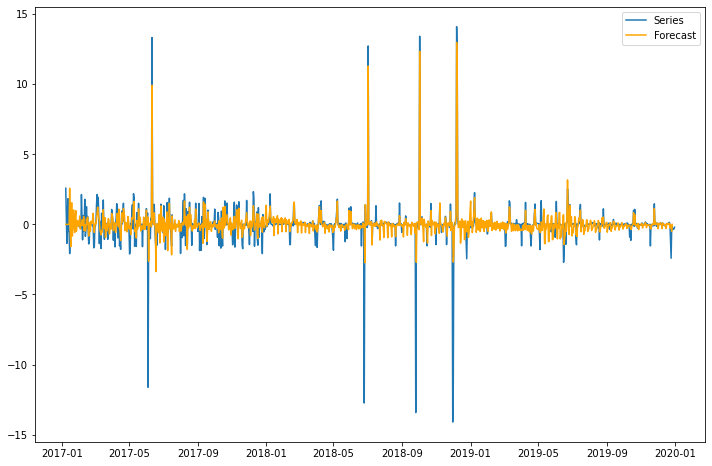

In [103]:
evaluate_model(differenced_ts, my_order_1, my_seasonal_order_1)

#### Segundo modelo propuesto:
* Mirando la Autocorrelación, veo para la parte MA, un q=1
* Mirando la Autocorrelación Parcial, veo para la parte AR, un p=2
* d=0 
* Componentes estacionales: Veo que hay un patrón cada 7 muestras (ciclo semanal):
    * D=1
    * Q=1
    * P=2
    * s=7

In [86]:
my_order_2 = (2, 0, 1) #(p,d,q)
my_seasonal_order_2 = (2, 1, 1, 7) #(P,D,Q,s)

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                     
Dep. Variable:                        diff_comb1   No. Observations:                 1085
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 7)   Log Likelihood               -1665.348
Date:                           Fri, 23 Sep 2022   AIC                           3344.696
Time:                                   11:51:44   BIC                           3379.576
Sample:                                        0   HQIC                          3357.904
                                          - 1085                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1864      0.763     -0.244      0.807      -1.682       1.309
ar.L2          0.0237      0.177      0.134

/Users/ari/opt/miniconda3/envs/ari-env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(<statsmodels.tsa.statespace.sarimax.SARIMAX at 0x284eb9430>,
 <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x284f316a0>)

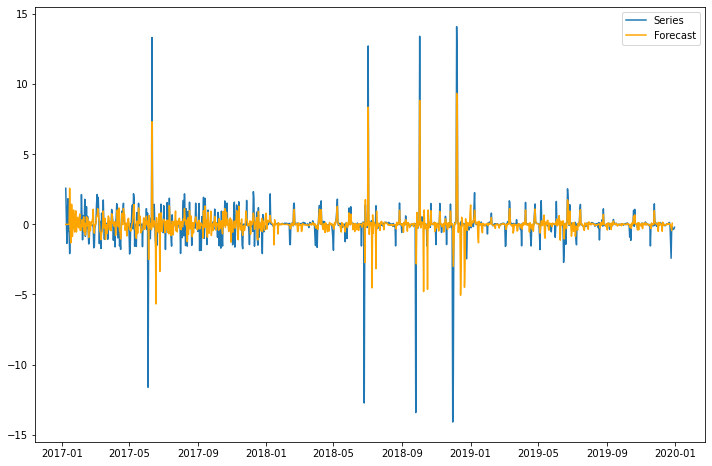

In [104]:
evaluate_model(differenced_ts, my_order_2, my_seasonal_order_2)